In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

from models.gan import Generator, Discriminator, train_gan
from data.toy_dataset import get_25gaussians_grid_dataloader,GaussianGridDataset

import matplotlib.pyplot as plt
import numpy as np
import torch
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from torchvision import transforms
from torch.utils.data import DataLoader

100%|██████████| 100000/100000 [00:06<00:00, 15152.40it/s]


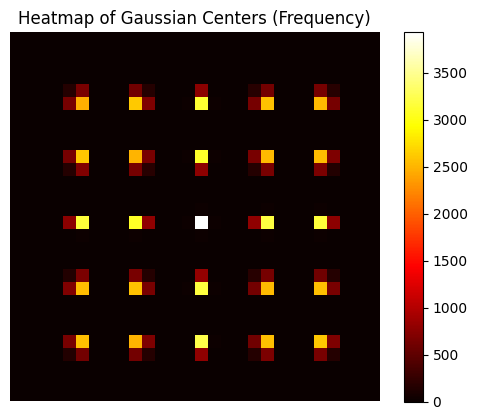

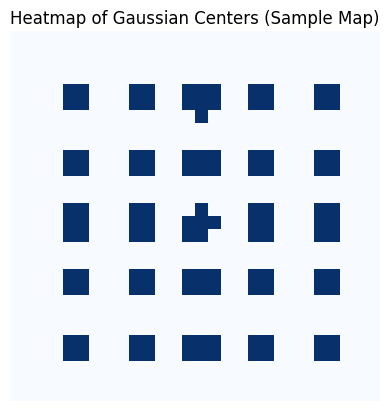

In [ ]:


# Function to plot the heatmap of the centers of the 25 Gaussians dataset
def plot_heatmap_of_centers(dataset, grid_size=28):
    # Initialize a grid to count the frequency of samples from each center
    heatmap = np.zeros((grid_size, grid_size))
    sample_map = np.zeros((grid_size, grid_size))#no heat, white background for values 0, blue for the rest
    
    # Iterate through the dataset and count occurrences of each Gaussian center
    for point in tqdm(dataset):
        grid = point.numpy()  # Convert tensor to numpy array
        # print(grid.sum())
        
        #find indices where grid is 1
        indices = np.where(grid == 1)
        heatmap[indices] += 1
        sample_map[indices] = 1
    
    # Plot the heatmap
    plt.imshow(heatmap, cmap='hot', interpolation='nearest')
    plt.colorbar()  # Add a color bar to indicate frequency
    plt.title("Heatmap of Gaussian Centers (Frequency)")
    plt.axis('off')  # Turn off axis
    plt.show()
    
    # Plot the heatmap
    plt.imshow(sample_map, cmap='Blues', interpolation='nearest')
    plt.title("Heatmap of Gaussian Centers (Sample Map)")
    plt.axis('off')  # Turn off axis
    plt.show()
    

# Example usage
grid_size = 28
num_samples = 100000
std_dev = 0.2

# Create the dataset
dataset = GaussianGridDataset(grid_size=grid_size, num_samples=num_samples, std_dev=std_dev)

# Plot the heatmap showing how frequently each center has been sampled
plot_heatmap_of_centers(dataset, grid_size=grid_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Number of training samples: 24000
Number of validation samples: 4000


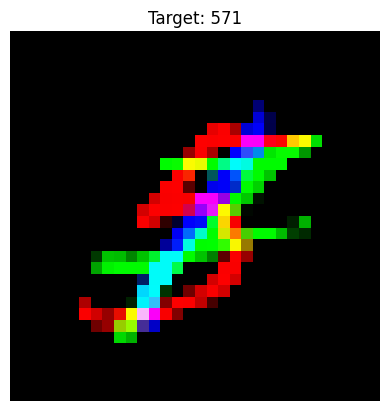

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


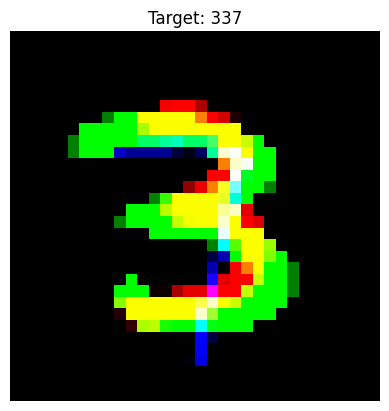

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


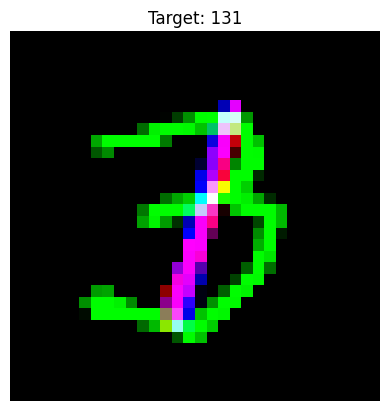

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


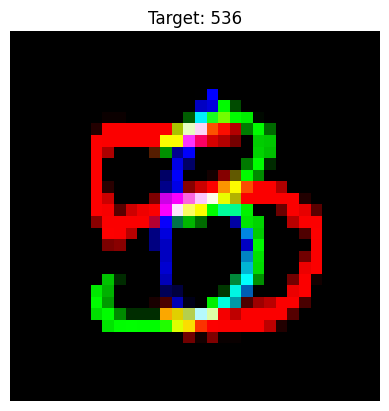

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


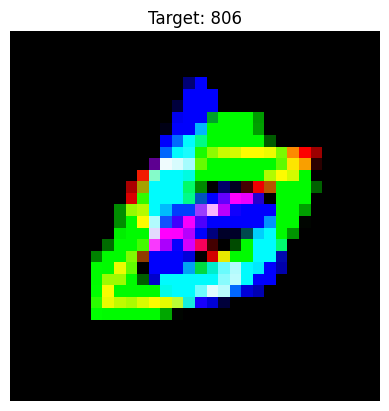

In [5]:
from data.stack_mnist import StackedMNIST, _data_transforms_stacked_mnist

# Function to plot a batch of images
def plot_batch(dataset, num_images=5):
    """Plots 'num_images' samples from the dataset."""
    for i in range(num_images):
        img, target = dataset[i]
        img = img.permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
        plt.imshow(img)
        plt.title(f"Target: {target}")
        plt.axis("off")
        plt.show()

root_path = "data"

# Get data transforms
train_transform, valid_transform = _data_transforms_stacked_mnist()

# Load training and validation datasets
train_dataset = StackedMNIST(root=root_path, train=True, transform=train_transform, download=True,subset_ratio=0.2)
valid_dataset = StackedMNIST(root=root_path, train=False, transform=valid_transform, download=True,subset_ratio=0.2)

# Print dataset lengths
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(valid_dataset)}")

# Visualize a few samples from the training dataset
plot_batch(train_dataset, num_images=5)

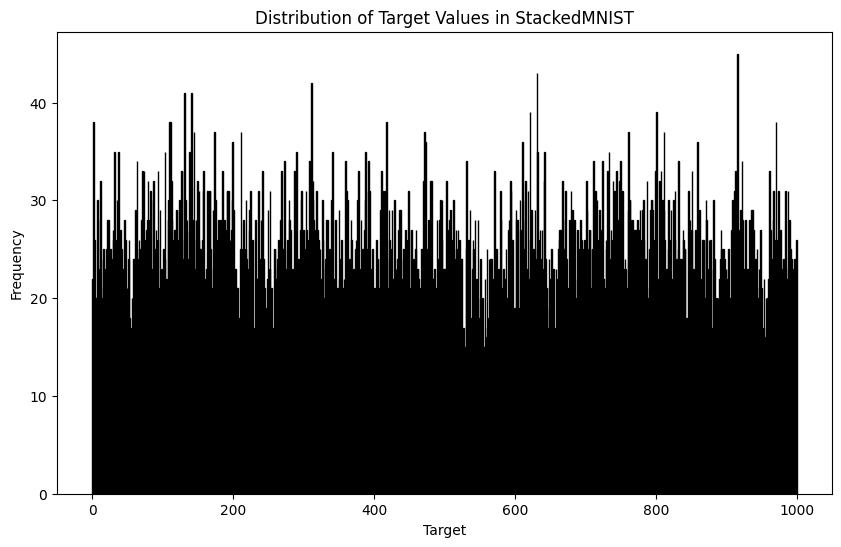

In [6]:
def plot_target_distribution(dataset, batch_size=64):
    """
    Function to plot the distribution of target values in a StackedMNIST dataset.

    Args:
        dataset: The StackedMNIST dataset (train or test).
        batch_size: The batch size to use while loading data (default is 64).
    """
    # DataLoader for batching
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # List to store all target values
    targets = []

    # Iterate through the dataset and collect targets
    for img, target in dataloader:
        targets.extend(target.numpy())  # Append the target values to the list

    # Convert targets to a 1D array (flatten the list)
    targets = np.array(targets)

    # Count the occurrences of each target
    target_counts = Counter(targets)

    # Prepare data for plotting
    target_values = list(target_counts.keys())
    frequencies = list(target_counts.values())

    # Plotting the distribution
    plt.figure(figsize=(10, 6))
    plt.bar(target_values, frequencies, width=1.0, edgecolor='black')
    plt.xlabel('Target')
    plt.ylabel('Frequency')
    plt.title('Distribution of Target Values in StackedMNIST')
    plt.show()
    
# Plot the distribution of target values in the training dataset
plot_target_distribution(train_dataset)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Number of training samples: 24000
Number of validation samples: 4000


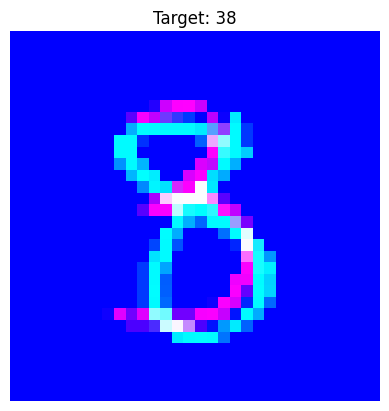

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


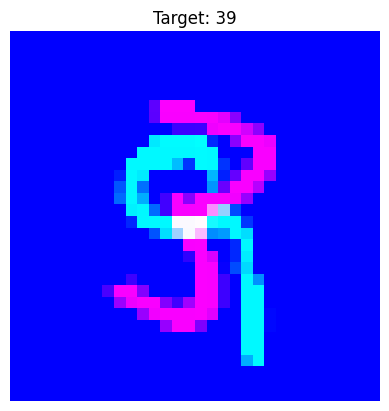

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


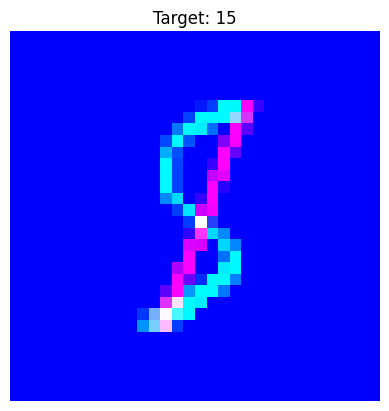

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


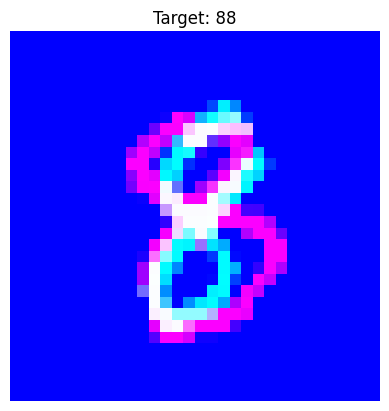

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


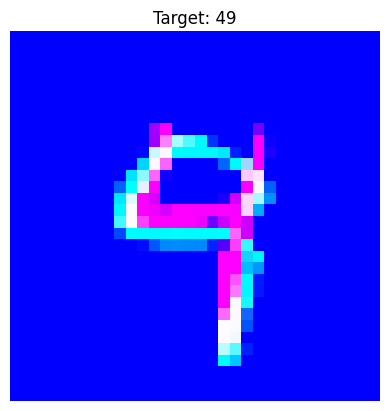

In [7]:
from data.stack_mnist2D import StackedMNIST2D, _data_transforms_stacked_mnist_2d

# Function to plot a batch of images
def plot_batch_2D(dataset, num_images=5):
    """Plots 'num_images' samples from the dataset."""
    for i in range(num_images):
        img, target = dataset[i]
        img = img.permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
        # we only have 2 channels so we need to add a third one full of zeros
        img = torch.cat((img, torch.ones_like(img)), dim=2)

        plt.imshow(img)
        plt.title(f"Target: {target}")
        plt.axis("off")
        plt.show()

root_path = "data"

# Get data transforms
train_transform, valid_transform = _data_transforms_stacked_mnist_2d()

# Load training and validation datasets
train_dataset = StackedMNIST2D(root=root_path, train=True, transform=train_transform, download=True, subset_ratio=0.2)
valid_dataset = StackedMNIST2D(root=root_path, train=False, transform=valid_transform, download=True, subset_ratio=0.2)

# Print dataset lengths
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(valid_dataset)}")

# Visualize a few samples from the training dataset
plot_batch_2D(train_dataset, num_images=5)

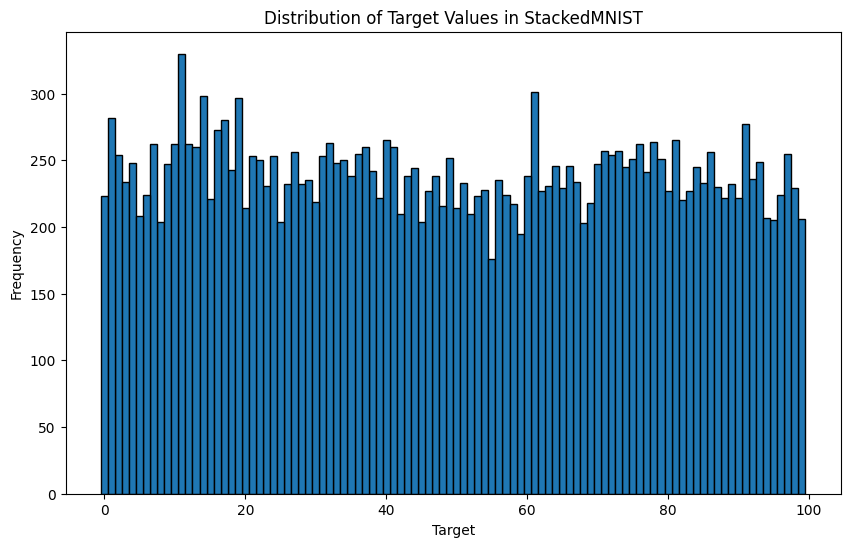

In [9]:
def plot_target_distribution_2D(dataset, batch_size=64):
    """
    Function to plot the distribution of target values in a StackedMNIST dataset.

    Args:
        dataset: The StackedMNIST dataset (train or test).
        batch_size: The batch size to use while loading data (default is 64).
    """
    # DataLoader for batching
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # List to store all target values
    targets = []

    # Iterate through the dataset and collect targets
    for img, target in dataloader:
        targets.extend(target.numpy())  # Append the target values to the list

    # Convert targets to a 1D array (flatten the list)
    targets = np.array(targets)

    # Count the occurrences of each target
    target_counts = Counter(targets)

    # Prepare data for plotting
    target_values = list(target_counts.keys())
    frequencies = list(target_counts.values())

    # Plotting the distribution
    plt.figure(figsize=(10, 6))
    plt.bar(target_values, frequencies, width=1.0, edgecolor='black')
    plt.xlabel('Target')
    plt.ylabel('Frequency')
    plt.title('Distribution of Target Values in StackedMNIST')
    plt.show()
    
# Plot the distribution of target values in the training dataset
plot_target_distribution_2D(train_dataset)